# <u>Intro a Series de Tiempo con FbProphet</u>


Prophet es un conocido modelo local de series temporales estructurales bayesianas.

## Cómo funciona Prophet

Prophet es muy útil para conjuntos de datos:

* Que contengan un periodo de tiempo extendido (meses o años) de observaciones históricas detalladas (por hora, día o semana)

* Que tengan varias estacionalidades muy marcadas

* Que incluyan eventos anteriormente conocidos importantes, pero irregulares

* Que les falten puntos de datos o tengan casos atípicos grandes

* Que tengan tendencias de crecimiento no lineal que se aproximen a un límite.

Prophet es un modelo de regresión aditiva con una tendencia de curva de crecimiento lineal o logística por partes. Incluye un componente estacional anual modelado usando series de Fourier y un componente estacional semanal modelado usando variables ficticias.

# Importando librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
import seaborn as sns

# Importando Data
- Dataset: Pasajeros de aerolínea
- Unidad: Miles

In [ ]:
#Importamos la data
df = pd.read_csv('international-airline-passengers.csv')

In [ ]:
df.columns = ['year','passengers']

In [ ]:
df.head(10)

,year,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


# Preprocesamiento de data y visualización

__Convertimos el formato de fecha:__

In [ ]:
df['year'] = pd.to_datetime(df['year'], format='%Y-%m')

__Establecer índice como la columna de fecha y hora para manipulaciones más fáciles:__

---



In [ ]:
y = df.set_index('year')

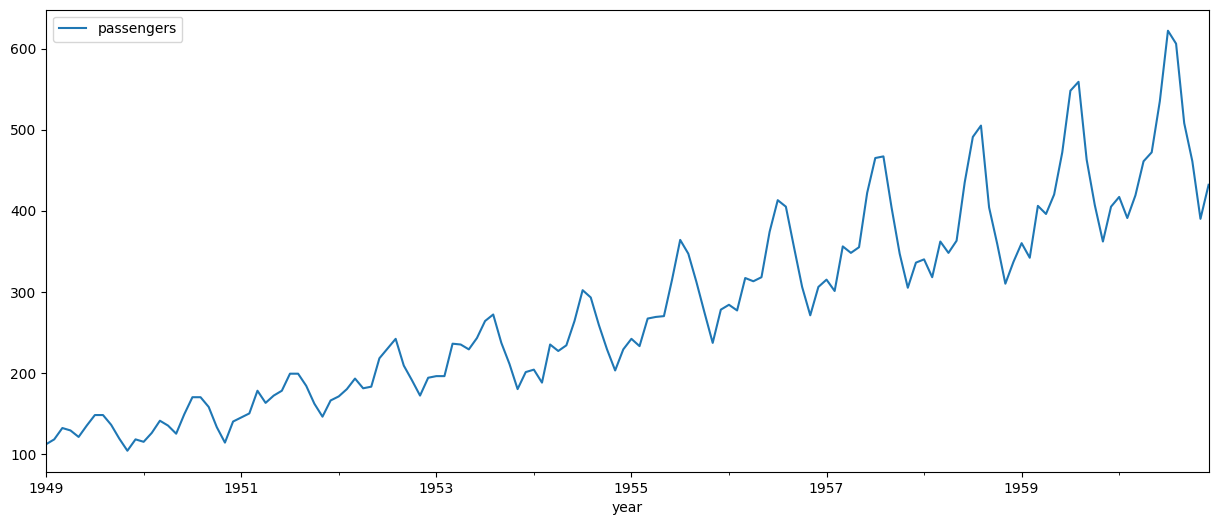

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

__Cajas y bigotes:__
- Los valores medianos a través de los años confirman una tendencia al alza
- Aumento constante de la propagación, o 50% medio de los datos (cuadros) con el tiempo
- Un modelo que considere la estacionalidad podría funcionar bien

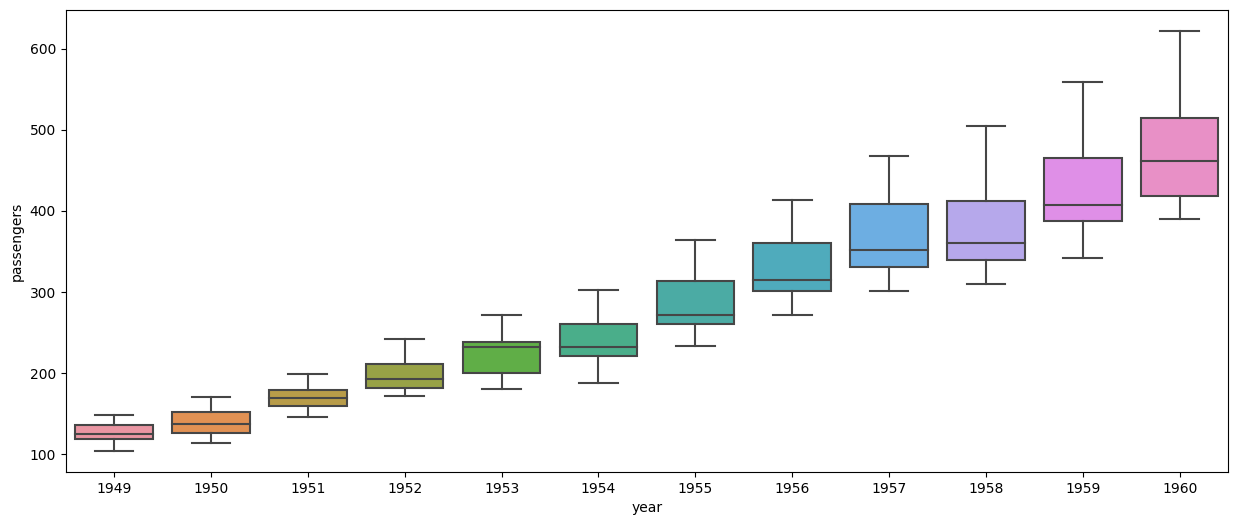

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x=y.passengers.index.year, y=y.passengers, ax=ax)
plt.show()

## Prophet
- [Prophet] (https://facebook.github.io/prophet/) es un software de código abierto lanzado por el equipo de Core Data Science de Facebook.
- Prophet es un procedimiento para pronosticar datos de series de tiempo basado en un modelo aditivo / multiplicativo donde las tendencias no lineales se ajustan a la estacionalidad anual, semanal y diaria, más los efectos de vacaciones.
- Funciona mejor con series de tiempo que tienen fuertes efectos estacionales y varias temporadas de datos históricos.
- Prophet es robusto ante los datos faltantes y los cambios en la tendencia, y generalmente maneja bien los valores atípicos.
- El paquete Prophet proporciona parámetros intuitivos que son fáciles de ajustar.

__Parámetros de tendencia__

- crecimiento: 'lineal' o 'logístico' para especificar una tendencia lineal o logística
- puntos de cambio: lista de fechas en las que se incluyen posibles puntos de cambio (automático si no se especifica)
- n_changepoints: si no se proporcionan puntos de cambio, puede proporcionar el número de puntos de cambio que se incluirán automáticamente
- changepoint_prior_scale: parámetro para cambiar la flexibilidad de la selección automática de puntos de cambio


__Estacionalidad y parámetros de vacaciones__

- Estacionalidad anual: ajusta la estacionalidad anual
- semanal_estacionalidad: Ajustar estacionalidad semanal
- daily_seasonality: ajusta la estacionalidad diaria
- vacaciones: marco de datos del feed que contiene el nombre y la fecha de vacaciones
- seasonality_prior_scale: parámetro para cambiar la fuerza del modelo de estacionalidad
- holiday_prior_scale: parámetro para cambiar la fuerza del modelo de vacaciones

Prophet requiere que los nombres de las variables en la serie de tiempo sean:

- y - Target
- ds - Fecha y hora

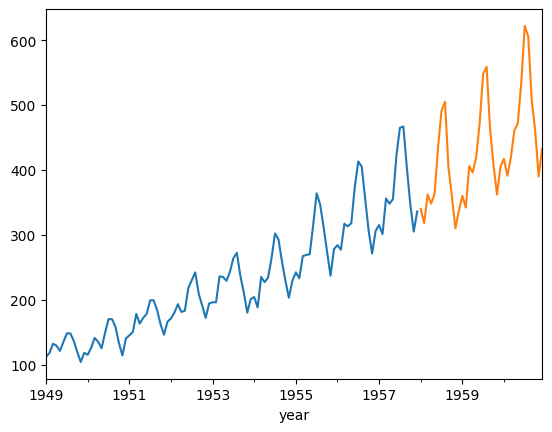

In [ ]:
#divide into train and validation set
train = y[:int(0.75*(len(y)))]
valid = y[int(0.75*(len(y))):]

#plotting the data
train['passengers'].plot()
valid['passengers'].plot()
plt.show()

In [ ]:
train.head()

,passengers
year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
print(train.shape)
print(valid.shape)

(108, 1)
(36, 1)


In [ ]:
train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train.passengers.values

In [ ]:
train_prophet.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
import os
# Let cmdstanpy know where CmdStan is
os.environ["CMDSTAN"] = "./cmdstan-2.23.0"

from prophet import Prophet

In [ ]:
#instantiate Prophet with only yearly seasonality as our data is monthly
model = Prophet()
model.fit(train_prophet) #fit the model with your dataframe

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfwayi8zx/lr0e7m45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfwayi8zx/rmzcsyoo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17604', 'data', 'file=/tmp/tmpfwayi8zx/lr0e7m45.json', 'init=/tmp/tmpfwayi8zx/rmzcsyoo.json', 'output', 'file=/tmp/tmpfwayi8zx/prophet_model48_w26j3/prophet_model-20240111033250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:32:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:32:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 36, freq = 'MS')
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
139,1960-08-01
140,1960-09-01
141,1960-10-01
142,1960-11-01


In [ ]:
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat']]

,ds,yhat
0,1949-01-01,94.063725
1,1949-02-01,90.279598
2,1949-03-01,121.217738
3,1949-04-01,114.044175
4,1949-05-01,113.605505
...,...,...
139,1960-08-01,548.443272
140,1960-09-01,511.578231
141,1960-10-01,480.747994
142,1960-11-01,455.417988


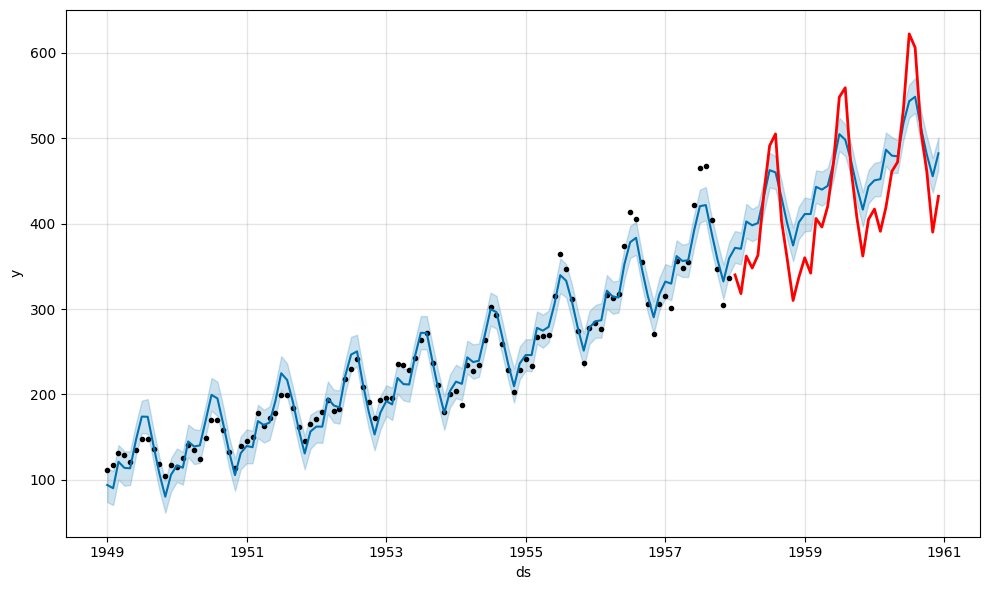

In [ ]:
fig = model.plot(forecast)
#plot the predictions for validation set

plt.plot(valid, label='Valid', color = 'red', linewidth = 2)

plt.show()

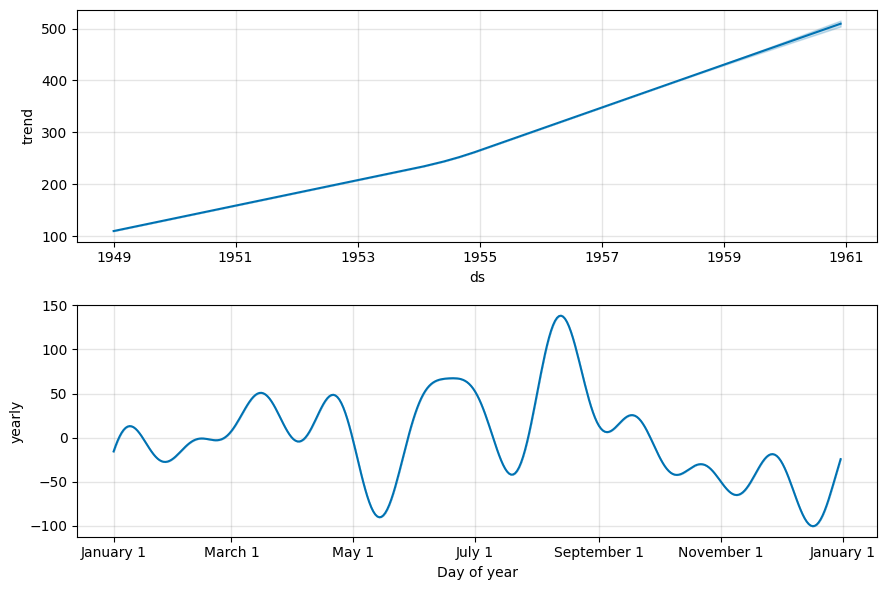

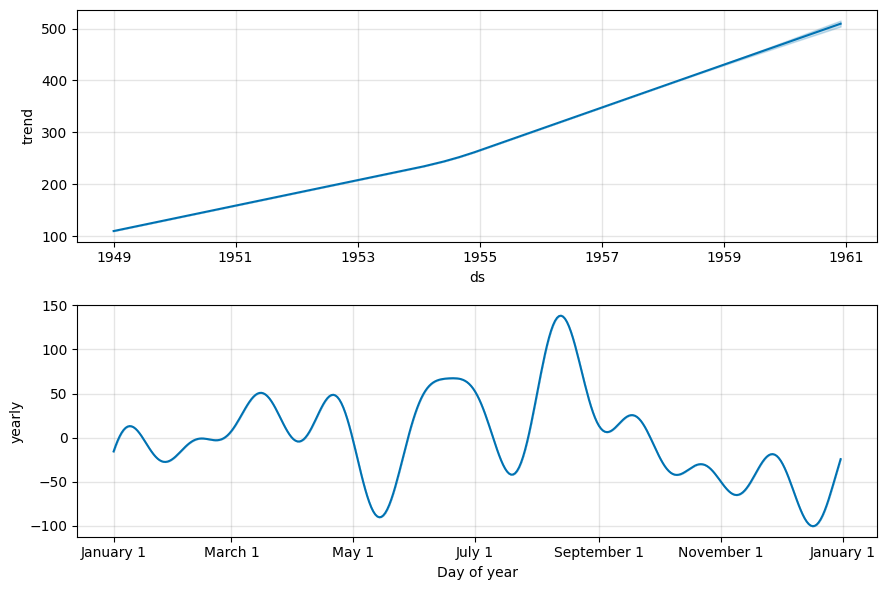

In [ ]:
model.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [ ]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

In [ ]:
evaluate_forecast(y, forecast.yhat)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,rmse
0,0.952903,18.853851,11.723525,673.113162,0.007126,25.944424


In [ ]:
#definiendo que la estacionalidad sea anual y el modelo multiplicativo
model = Prophet(yearly_seasonality=True,seasonality_mode= 'multiplicative')
model.fit(train_prophet) #fit the model with your dataframe

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfwayi8zx/4rxbz37n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfwayi8zx/iww0er6d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87421', 'data', 'file=/tmp/tmpfwayi8zx/4rxbz37n.json', 'init=/tmp/tmpfwayi8zx/iww0er6d.json', 'output', 'file=/tmp/tmpfwayi8zx/prophet_modelqxh6au82/prophet_model-20240111033254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:32:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:32:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


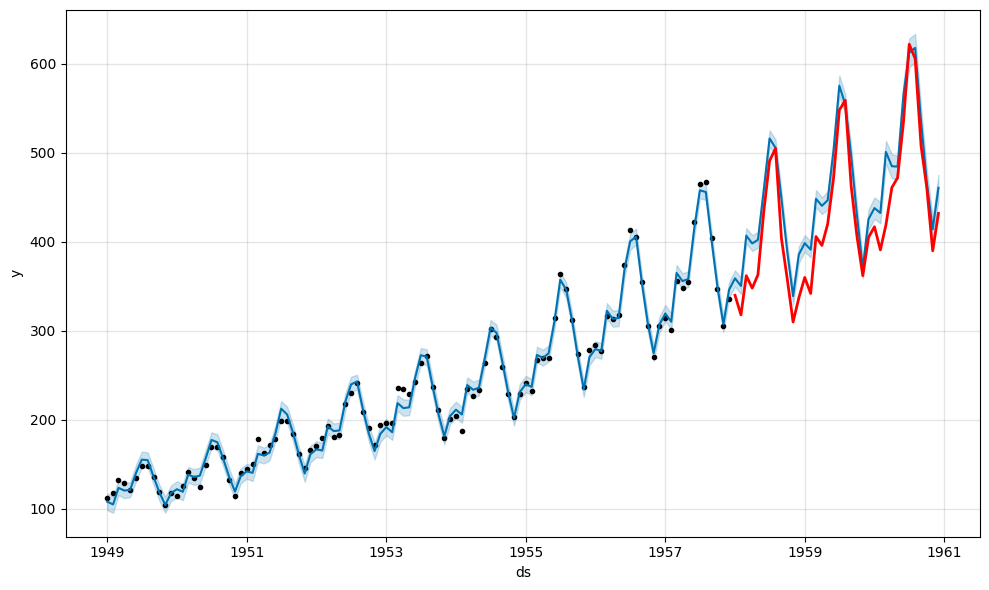

In [ ]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 36, freq = 'MS')
forecast = model.predict(future)
fig = model.plot(forecast)
#plot the predictions for validation set

plt.plot(valid, label='Valid', color = 'red', linewidth = 2)

plt.show()

In [ ]:
evaluate_forecast(y, forecast.yhat)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,rmse
0,0.977936,11.413422,6.354026,315.338341,0.002635,17.757768


In [ ]:
model.params.keys()

odict_keys(['lp__', 'k', 'm', 'delta', 'sigma_obs', 'beta', 'trend'])

## Otro Ejemplo usando Prophet

In [ ]:
# Descarga de datos, DEMANDA ELECTRICA (MW) desde 2011-12-31 al 2014-12-31
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv'
datos = pd.read_csv(url, sep=',')

In [ ]:
datos['fecha'] = pd.to_datetime(datos['fecha'], format='%Y/%m/%d')
print(datos)
datos.dtypes

            x      fecha
0    0.429795 1991-07-01
1    0.400906 1991-08-01
2    0.432159 1991-09-01
3    0.492543 1991-10-01
4    0.502369 1991-11-01
..        ...        ...
199  0.761822 2008-02-01
200  0.649435 2008-03-01
201  0.827887 2008-04-01
202  0.816255 2008-05-01
203  0.762137 2008-06-01

[204 rows x 2 columns]


x               float64
fecha    datetime64[ns]
dtype: object

In [ ]:
datos = datos.set_index('fecha') # fecha como nombre de fila
datos = datos.rename(columns={'x': 'y'})

In [ ]:
datos

,y
fecha,
1991-07-01,0.429795
1991-08-01,0.400906
1991-09-01,0.432159
1991-10-01,0.492543
1991-11-01,0.502369
...,...
2008-02-01,0.761822
2008-03-01,0.649435
2008-04-01,0.827887


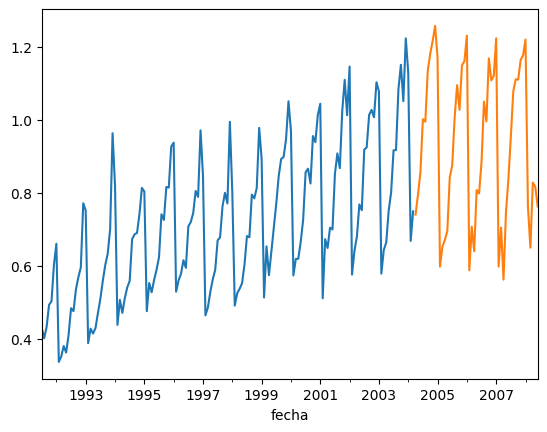

In [ ]:
#divide into train and validation set
train = datos[:int(0.75*(len(datos)))]
valid = datos[int(0.75*(len(datos))):]


#plotting the data
train['y'].plot()
valid['y'].plot()
plt.show()

In [ ]:
train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train.y.values

In [ ]:
#instantiate Prophet with only yearly seasonality as our data is monthly
model = Prophet( yearly_seasonality=True, seasonality_mode = 'multiplicative')
model.fit(train_prophet) #fit the model with your dataframe

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqnuc34vg/vfcpxzx2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqnuc34vg/scgihp2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12307', 'data', 'file=/tmp/tmpqnuc34vg/vfcpxzx2.json', 'init=/tmp/tmpqnuc34vg/scgihp2s.json', 'output', 'file=/tmp/tmpqnuc34vg/prophet_modelhuy9uznr/prophet_model-20240108183407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 51, freq = 'MS')
future

,ds
0,1991-07-01
1,1991-08-01
2,1991-09-01
3,1991-10-01
4,1991-11-01
...,...
199,2008-02-01
200,2008-03-01
201,2008-04-01
202,2008-05-01


In [ ]:
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat']]

,ds,yhat
0,1991-07-01,0.424098
1,1991-08-01,0.451749
2,1991-09-01,0.496282
3,1991-10-01,0.523870
4,1991-11-01,0.528472
...,...,...
199,2008-02-01,0.772973
200,2008-03-01,0.846300
201,2008-04-01,0.853683
202,2008-05-01,0.904591


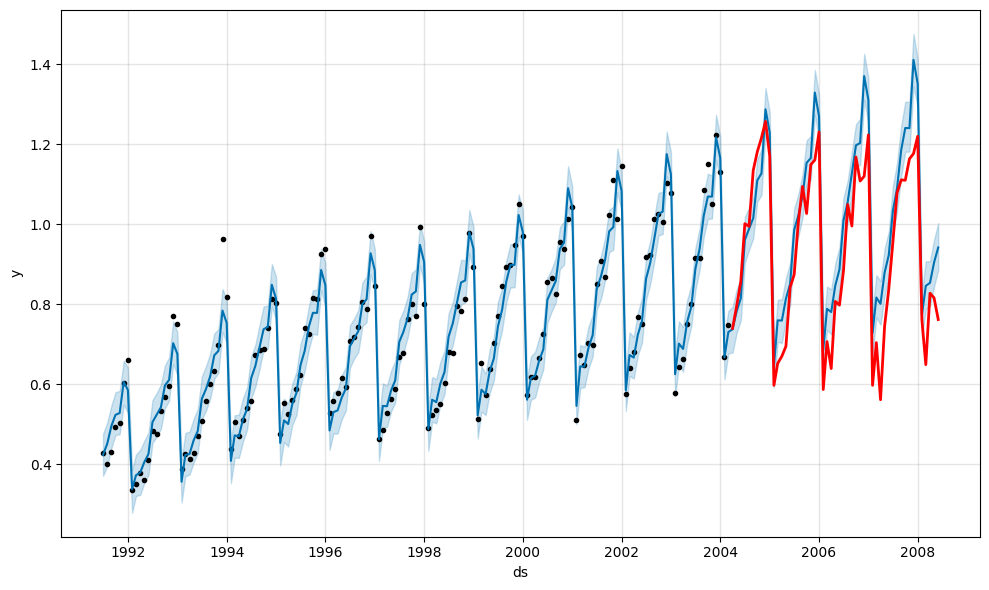

In [ ]:
fig = model.plot(forecast)
#plot the predictions for validation set

plt.plot(valid, label='Valid', color = 'red', linewidth = 2)

plt.show()

In [ ]:
evaluate_forecast(datos, forecast.yhat)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,rmse
0,0.916665,0.045875,0.033261,0.004203,0.001187,0.064829


In [ ]:
#instantiate Prophet with only yearly seasonality as our data is monthly
model = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True, seasonality_mode = 'multiplicative')
model.fit(train_prophet) #fit the model with your dataframe

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqnuc34vg/y540xxzx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqnuc34vg/f9rqamaa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59101', 'data', 'file=/tmp/tmpqnuc34vg/y540xxzx.json', 'init=/tmp/tmpqnuc34vg/f9rqamaa.json', 'output', 'file=/tmp/tmpqnuc34vg/prophet_modellthwwa9t/prophet_model-20240108183411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


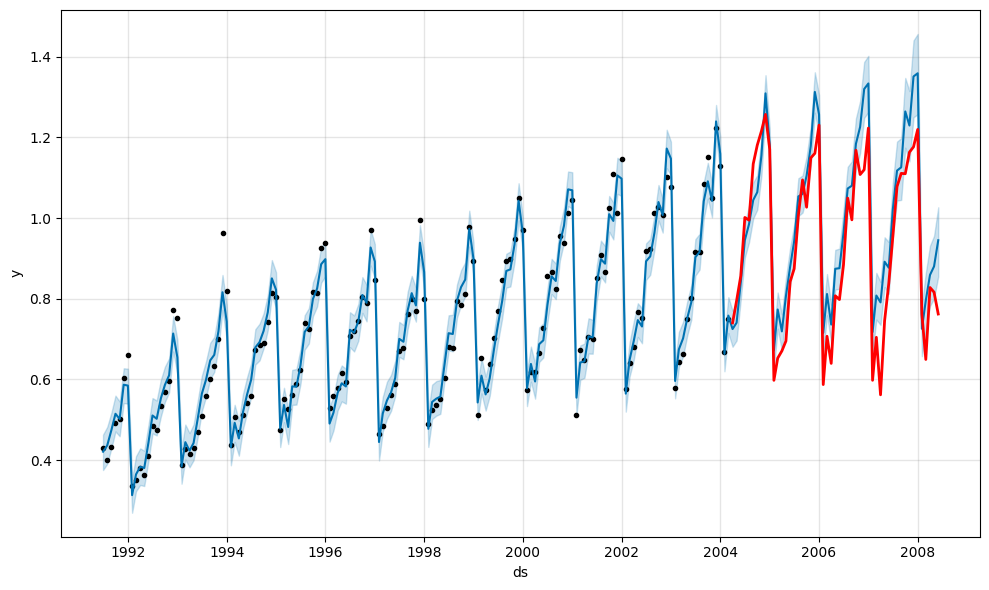

In [ ]:
future = model.make_future_dataframe(periods = 51, freq = 'MS')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.plot(valid, label='Valid', color = 'red', linewidth = 2)
plt.show()

In [ ]:
evaluate_forecast(datos, forecast.yhat)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,rmse
0,0.935293,0.039862,0.025252,0.003263,0.000928,0.057125
